Antoine Sutter

In [ ]:
import math
import random
import matplotlib.pyplot as plt

# Simulation of a balanced dice

First we generate random throws using python's built in math.random funtion. We're doing 10_000 throws and counting each occurences. With this, we expect all bars of the barchart to approximately be of even sizes, which with enough throws, it is. We will consider math.random to be fair, although it is worth noting that math.random is pseudo-random and cannot be used for secure code. It is fine for our use-case though.

## How would the histogram change if the sides are not equi-probable ?

Some of the bars would be higher than others.

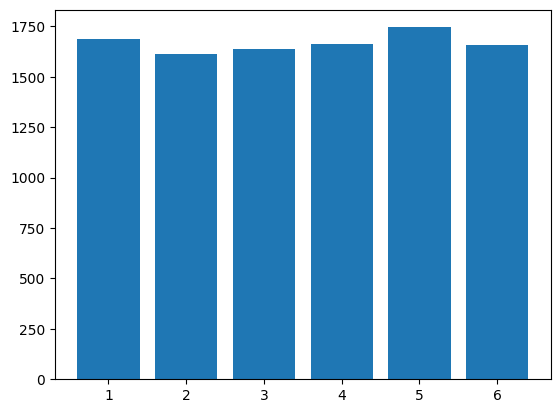

In [64]:
sides_count = 6
sides = [i + 1 for i in range(0, sides_count)]
throws = [1 + math.floor(random.random() * sides_count) for i in range(0, 10_000)]
occurences = [throws.count(side) for side in sides]

plt.bar(sides, occurences)
plt.show()

# Simulation of a biased coin toss

To generate a random number with a bias, we add that bias (a number between 0 and 1) to the random.random call, then flooring. Then if the result is 1 we consider it a head, 0 a tail.

That way, a bias of 0.5 will not affect the output at all. Likewise, a bias of 1 means you will always get heads. A bias of 0.7 means that 70% of the times, the coin will pick up head.

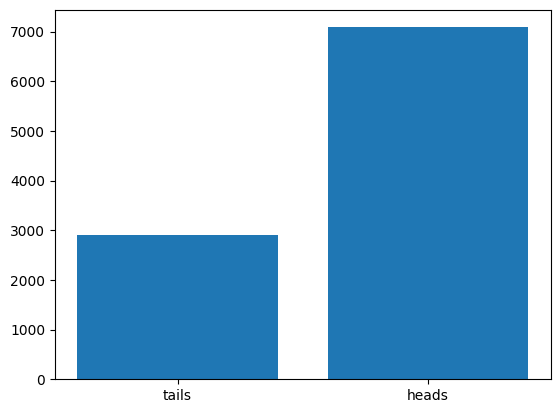

In [87]:
bias = 0.7
b_for_heads = 0
a_for_tails = 0

for i in range(0, 10_000):
    is_head = math.floor(random.random() + bias) == 1
    
    if is_head:
        b_for_heads += 1
    else:
        a_for_tails += 1

plt.bar(["tails", "heads"], [a_for_tails, b_for_heads])
plt.show()


# Simulation of a double biased coin toss

This time we will throw 2 counts with different biases and count how many times we get either (head,head), (head,tail), (tail,head) or (tail,tail). In this situation, because coints have different biases, we consider (head,tails) and (tails,head) to be different results.

We can see that with both biases at 0.5, we get 4 bars of equal heights. However they aren't the same anymore once the coints are biased.

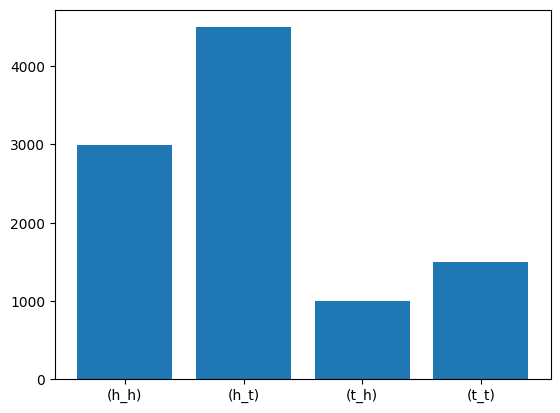

In [95]:
bias_a = 0.75
bias_b = 0.4

h_h = 0
h_t = 0
t_h = 0
t_t = 0

for i in range(0, 10_000):
    is_a_heads = math.floor(random.random() + bias_a) == 1
    is_b_heads = math.floor(random.random() + bias_b) == 1

    if is_a_heads and is_b_heads:
        h_h += 1
    if is_a_heads and not is_b_heads:
        h_t += 1
    if not is_a_heads and is_b_heads:
        t_h += 1
    if not is_a_heads and not is_b_heads:
        t_t += 1

plt.bar(["(h_h)", "(h_t)", "(t_h)", "(t_t)"], [h_h, h_t, t_h, t_t])
plt.show()

# Roulette method

The roulette method is sick as it allows you to pick up a weighted event by normalizing the probabilities from 0 to 1, where all probablilites sum up to 1 and then, generating a cummulative array of values where cummu[i] = sum(prop[0:i]).

Then by generating a number between 0 to 1 with a fair function such as random.random(), you can find the index of the event that was picked.

In [195]:
N = 5

def create_random_normalized_array(N):
    values = [random.random() for i in range(0, N)]
    total = sum(values)
    return [i * 1/total for i in values]

def create_cummulative_from_array(array):
    size = len(array)
    return [sum(array[0:i + 1]) for i in range(0, size)]

def find_smallest_cummulative(array, random_value):
    for index, value in enumerate(array):
        if value > random_value:
            return index
        
    return len(array) - 1

probabilities = create_random_normalized_array(N)
cummulative = create_cummulative_from_array(probabilities)

print(probabilities)
print(cummulative)

r = random.random()
index = find_smallest_cummulative(cummulative, r)
print(f"Random value is {r} and therfore event with index {index} was picked!")


[0.2921299648517066, 0.25181934240524007, 0.033870830005770756, 0.053507305437078996, 0.3686725573002036]
[0.2921299648517066, 0.5439493072569467, 0.5778201372627174, 0.6313274426997965, 1.0]
Random value is 0.8910235490637117 and therfore event with index 4 was picked!
